In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

In [20]:
data = pd.read_csv("Instagram - Cópia.csv", encoding = 'latin1')
print(data.head())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0       3920.0     2586.0         1028.0         619.0        56.0   98.0   
1       5394.0     2727.0         1838.0        1174.0        78.0  194.0   
2       4021.0     2085.0         1188.0           0.0       533.0   41.0   
3       4528.0     2700.0          621.0         932.0        73.0  172.0   
4       2518.0     1704.0          255.0         279.0        37.0   96.0   

   Comments  Shares  Likes  Profile Visits  Follows  \
0       9.0     5.0  162.0            35.0      2.0   
1       7.0    14.0  224.0            48.0     10.0   
2      11.0     1.0  131.0            62.0     12.0   
3      10.0     7.0  213.0            23.0      8.0   
4       5.0     4.0  123.0             8.0      0.0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

In [21]:
data.isnull().sum()

Impressions       1
From Home         1
From Hashtags     1
From Explore      1
From Other        1
Saves             1
Comments          1
Shares            1
Likes             1
Profile Visits    1
Follows           1
Caption           1
Hashtags          1
dtype: int64

# Parte 1 - Análise inicial

Primeiramente, podemos ver que os dados estão em float, o que não faz muito sentido. Mas dando uma olhada inicial, não acredito que vai prejudicar o projeto.

Temos um dataset com mais ou menos 100 postagens de um influenciador de Data Science, achei estranho pois fui no perfil dele e ele tinha 433 postagens: https://www.instagram.com/the.clever.programmer/

Ou seja, o dataset tá bem incompleto... o certo seria eu fazer um bot e ajeitar isso, mas até o presente momento 01/06/2022 não sei fazer um decente sem muitos bugs. Acredito que o próximo passo para o meu futuro projeto será aprender a fazer bots/chatbots etc, pois tá fazendo muita falta essa ferramenta pra extração de dados.

In [22]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Impressions     99 non-null     float64
 1   From Home       99 non-null     float64
 2   From Hashtags   99 non-null     float64
 3   From Explore    99 non-null     float64
 4   From Other      99 non-null     float64
 5   Saves           99 non-null     float64
 6   Comments        99 non-null     float64
 7   Shares          99 non-null     float64
 8   Likes           99 non-null     float64
 9   Profile Visits  99 non-null     float64
 10  Follows         99 non-null     float64
 11  Caption         99 non-null     object 
 12  Hashtags        99 non-null     object 
dtypes: float64(11), object(2)
memory usage: 10.8+ KB


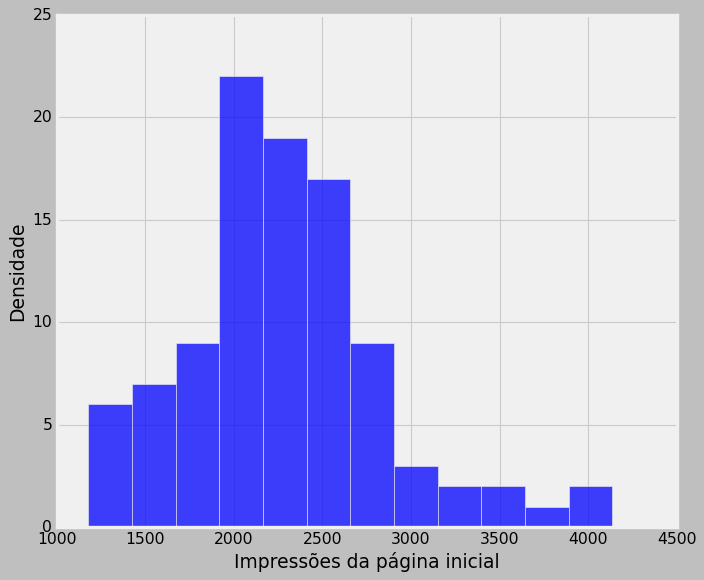

In [23]:
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
sns.histplot(data['From Home'])
plt.xlabel('Impressões da página inicial')
plt.ylabel('Densidade')
plt.show()

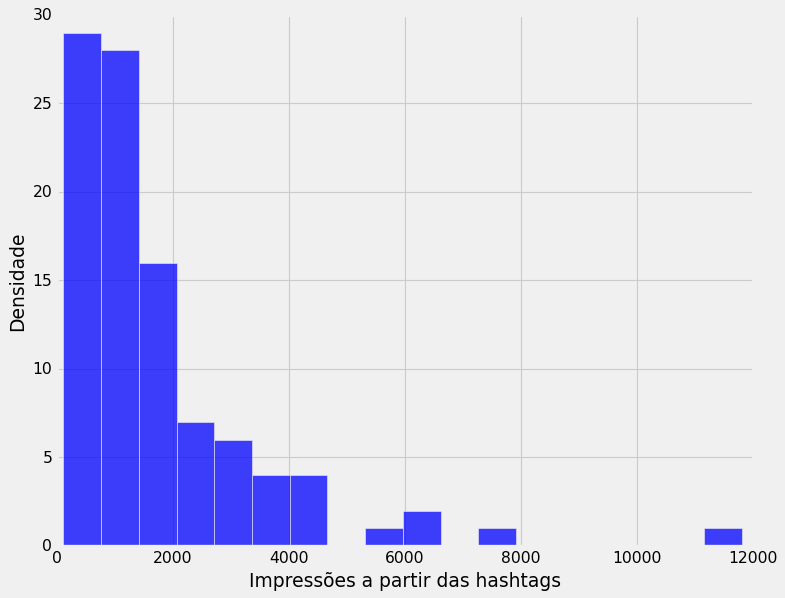

In [24]:
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
sns.histplot(data['From Hashtags'])
plt.xlabel('Impressões a partir das hashtags')
plt.ylabel('Densidade')
plt.show()

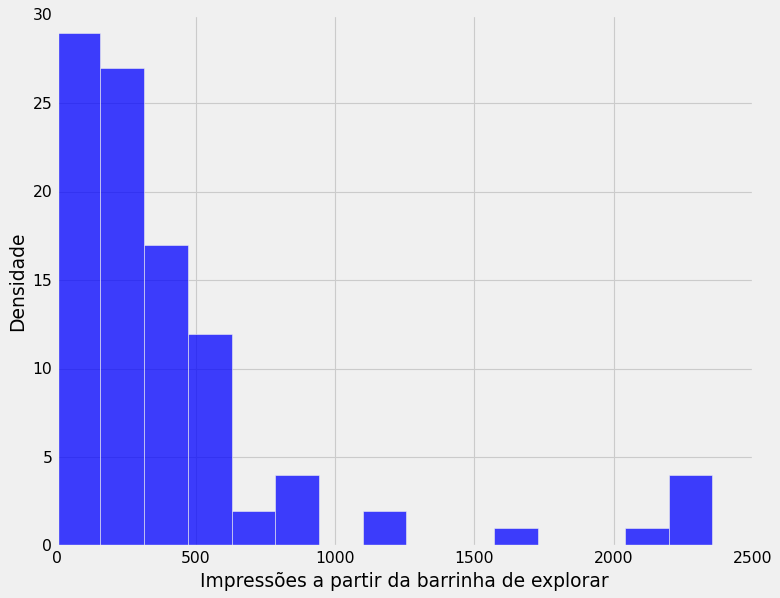

In [25]:
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
sns.histplot(data['From Explore'])
plt.xlabel('Impressões a partir da barrinha de explorar')
plt.ylabel('Densidade')
plt.show()

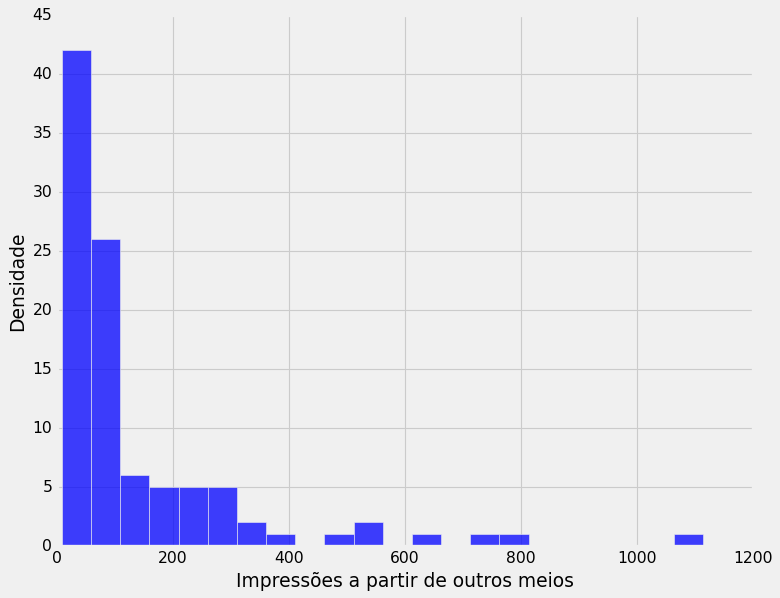

In [26]:
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
sns.histplot(data['From Other'])
plt.xlabel('Impressões a partir de outros meios')
plt.ylabel('Densidade')
plt.show()

In [27]:
home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()

labels = ['Página Inicial','Hashtags','Barrinha explorar','Outros']
values = [home, hashtags, explore, other]

fig = px.pie(data, values=values, names=labels, 
             title='Montante de impressões em gráfico de Donut', hole=0.5)
fig.show()

# Conclusões da Análise inicial

Eu sinceramente esperava que a barrinha de 'Pesquisa' do Instagram fosse ser mais influente, mas só com esse dataset não dá pra  saber se a barra do explorar é de fato menos usada ou se simplesmente 'Data Science' não é um tema tão interessante de se pesquisar no Instagram, e honestamente a segunda opção parece ser mais razoável :)

Outra coisa super interessante de se ver é como as Hashtags potencializam a visibilidade do post. Claro que se a gente for em tutoriais de SEO ou simplesmente em blogs de digital influencers, eles vão falar o quão é impactante e tudo mais, só que a visão deles é mais na prática! Confirmar essa informação em um dataset é algo digamos assim... muito satisfatório.

# Parte 2 - Desenvolvimento

Vamos agora desenvolver algumas ideias:

- Palavras usadas nas legendas dos posts:

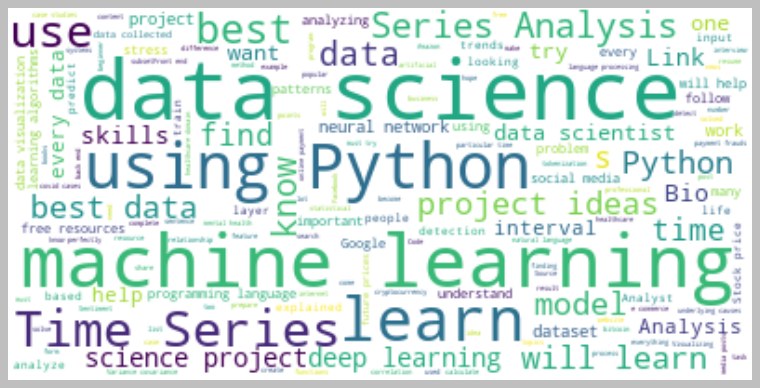

In [28]:
text = " ".join(i for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

- Palavras usadas nas Hashtags:

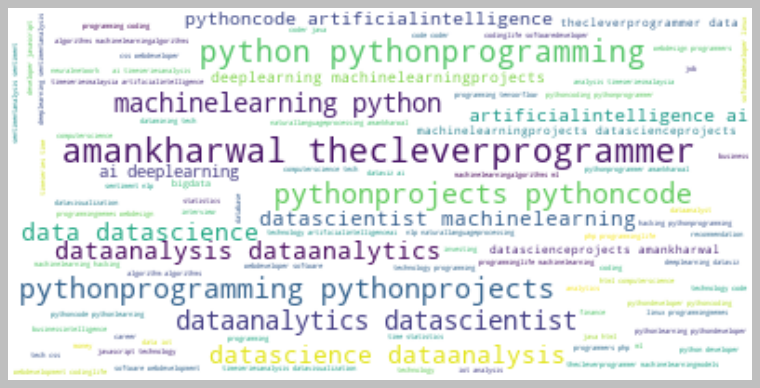

In [29]:
text = " ".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Esse gráfico permite ver o tipo de conteúdo que o autor tá postando, mas sinceramente seria muito mais interessante analisar os comentários e fazer um NLP dos sentimentos do montante desses comentários. Novamente, entramos num problema de extração de dados que um bot resolveria...

- Análise taxa de conversão: <br><br>
    A taxa de conversão é o número de seguidores novos / visitas ao perfil. Geralmente é dada em porcentagem pra facilitar entendimento. <br>
    É muito importante pra vendedores, etc, mas só a análise desse fator é insatisfatório pra tirar alguma conclusão mais complexa de vendas. Na verdade é mais um direcionador!

In [30]:
conversion_rate = (data["Follows"].sum() / data["Profile Visits"].sum()) * 100
print('Taxa de conversão: %.2f ' % conversion_rate, '%')

Taxa de conversão: 31.18  %


In [31]:
figure = px.scatter(data_frame = data, x="Profile Visits",
                    y="Follows", size="Follows", trendline="ols", 
                    title = "Relação entre seguidores e visitas ao perfil")
figure.show()

In [32]:
figure = px.scatter(data_frame = data, x="Likes",
                    y="Follows", size="Follows", trendline="ols", 
                    title = "Relação entre seguidores e likes")
figure.show()

In [33]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Follows", size="Follows", trendline="ols", 
                    title = "Relação entre seguidores e impressões gerais")
figure.show()

O que dá pra tirar desses gráficos é que as relações entre seguidores e engajamentos são praticamente lineares. Parece 'boba' essa informação, mas ajuda muito a criar um modelo de IA.

In [34]:
correlation = data.corr()
print(correlation["Follows"].sort_values(ascending=False))

Follows           1.000000
Profile Visits    0.872862
Impressions       0.804064
From Hashtags     0.678926
Likes             0.638916
From Other        0.588807
From Home         0.484809
From Explore      0.431809
Saves             0.396706
Shares            0.301200
Comments          0.104389
Name: Follows, dtype: float64


Ou seja, pra ganhar seguidor tem que focar nas hashtags e nos likes, um direcionador é uma pesquisa que fizeram pra mostrar os melhores horários de post no Insta:<br>
Leve desabafo -> agora sempre que me pedirem pra eu salvar e comentar o post, vou mostrar um print dessa tabela de correlação :-(

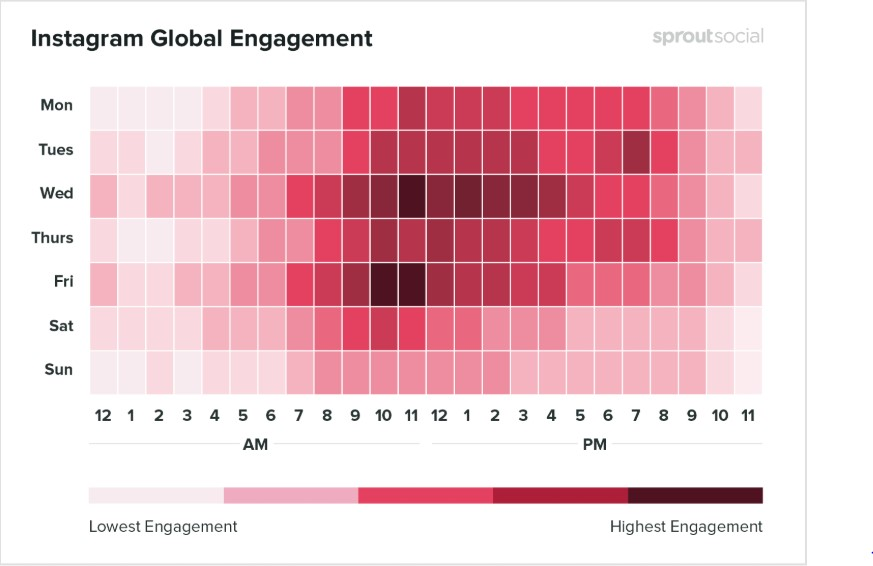

# Parte 3 - Aprendizado de Máquina

In [35]:
x = np.array(data[['Likes', 'Saves', 'Comments', 'Shares', 
                   'Profile Visits', 'Follows']])
y = np.array(data["Impressions"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=42)

Vamos criar um modelo comumente usado em Big Data e Social media por aprendizado online:

In [36]:
model = PassiveAggressiveRegressor()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.9356409967518621

Parece um resultado genuíno sem overfit.